In [1]:
#connection drive
from google.colab import drive
drive.mount('/content/drive')
!pip3 install TurkishStemmer

Mounted at /content/drive


In [3]:
from myfiles.utils import utils

In [4]:
X,y = utils.getXyData()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
init


In [4]:
type(y)

numpy.ndarray

In [5]:


from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 

import numpy as np 

training_samples = 170000          # Trains on 200 samples
validation_samples = 30000     # Validates on 10,000 samples
test_samples = 34000

maxlen = 50                   # Cuts off reviews after 100 words
max_words = 30000              # Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 101600 unique tokens.


In [ ]:
# for (review,label) in zip(sequences, y):
#     print(review , label)

In [ ]:
len(word_index)

101600

In [6]:
x = pad_sequences(sequences, maxlen=maxlen)

y = np.asarray(y)
print('Shape of data tensor:', x.shape)
print('Shape of label tensor:', y.shape) 

Shape of data tensor: (234623, 50)
Shape of label tensor: (234623,)


In [7]:
def splitKFoldStratified(X, y):
        from sklearn.model_selection import StratifiedKFold
        
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        
        Xtrain_array = []
        Xtest_array = []
        Ytrain_array = []
        Ytest_array = []
        
        k_fold = 0 
        
        for train_ix, test_ix in kfold.split(X, y):
            k_fold+=1
            # select rows
            xtrain, xtest = X[train_ix], X[test_ix]
            ytrain, ytest = y[train_ix], y[test_ix]
            
            Xtrain_array.append(xtrain)
            Xtest_array.append(xtest)
            Ytrain_array.append(ytrain)
            Ytest_array.append(ytest)
            
            # summarize train and test composition
            train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
            test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
            print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
        
        
        return [Xtrain_array, Xtest_array, Ytrain_array, Ytest_array]

In [8]:
y.shape
x.shape

(234623, 50)

In [8]:
a = splitKFoldStratified(x,y)

>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175796, Test: 0=2976, 1=43948
>Train: 0=11904, 1=175795, Test: 0=2975, 1=43949


In [ ]:
len(a[2][0])

211160

In [ ]:
len(word_index)

101600

In [10]:
#?????
def embedding_matrix_trmodeljune():
    
    from gensim.models import KeyedVectors
    word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Word2Vec/trmodel', binary=True)

    unique_words = len(word_index)
    total_words = unique_words + 1
    print(total_words)
    skipped_words = 0
    embedding_dim = 400  
    embedding_matrix = np.zeros((total_words, embedding_dim))
    embedding_vector = None
    
    for word, index in tokenizer.word_index.items():
        try:
            embedding_vector = word_vectors[word]
        except:
            skipped_words = skipped_words+1
            pass
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    print("Embeddings Matrix shape : ",embedding_matrix.shape)
    return embedding_matrix

In [19]:
def embedding_matrix_1():
    
    from gensim.models import KeyedVectors
    word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Word2Vec/trmodel', binary=True)

    unique_words = len(word_index)
    total_words = unique_words + 1
    print(total_words)
    skipped_words = 0
    embedding_dim = 400  
    embedding_matrix = np.zeros((total_words, embedding_dim))
    embedding_vector = None
    
    for word, index in tokenizer.word_index.items():
        try:
            embedding_vector = word_vectors[word]
        except:
            skipped_words = skipped_words+1
            pass
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    print("Embeddings Matrix shape : ",embedding_matrix.shape)
    return embedding_matrix

In [9]:
def embedding_matrix_2():    
    import os 
    import numpy as np

    glove_dir = '/content/drive/MyDrive/lstmWorks/'

    embeddings_index_1 = {}
    f = open(os.path.join(glove_dir, 'vectors.txt'))
    for line in f:
        values = line.split()
        word = values[0]
    #     print(len(word))
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index_1[word] = coefs

    f.close()
    print('Found %s word vectors.' % len(embeddings_index_1))
    # be careful after from this line
    embedding_dim = 300
    print(max_words)
    
    # unique_words = len(word_index)
    # total_words = unique_words + 1
    print()
    
    embedding_matrix = np.zeros((max_words, embedding_dim))
    
   
    
    for word, i in tokenizer.word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index_1.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [12]:
embedding_matrix = embedding_matrix_1()

101601
Embeddings Matrix shape :  (101601, 400)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.90907228, -0.77570266, -0.69637978, ...,  0.95020956,
        -0.55103862, -1.73275089],
       [ 0.51016784, -0.4183571 , -1.77249575, ...,  1.67167985,
         0.35844764, -0.11615919],
       ...,
       [ 0.00722535, -0.12378334,  0.0980953 , ...,  0.0494529 ,
        -0.07154707, -0.03811685],
       [ 0.00722535, -0.12378334,  0.0980953 , ...,  0.0494529 ,
        -0.07154707, -0.03811685],
       [ 0.00722535, -0.12378334,  0.0980953 , ...,  0.0494529 ,
        -0.07154707, -0.03811685]])

In [10]:
# Now, let’s display the training and validation loss and accuracy

# Plotting results
def vizualize_loss_acc(history):
    
    import matplotlib.pyplot as plt

    acc = history.history['acc']
#     val_acc = history.history['val_acc']
    loss = history.history['loss']
#     val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc, 'b', label='Validation acc')

    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    # *******************************************************************
    plt.plot(epochs, loss, 'bo', label='Training loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.88.254.218:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.88.254.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.88.254.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [39]:
def makeNewModel(x_train, x_test, y_train, y_test,embedding_matrix,embedding_dim, total_words):

    from keras.models import Sequential
    from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
    
    


    model = Sequential()
    model.add(Embedding(input_dim = total_words, input_length=maxlen, weights=[embedding_matrix],
                        output_dim=embedding_dim , trainable=False, mask_zero=True))
    # Masking layer for pre-trained embeddings
    model.add(Masking(mask_value=0.0))


    # Recurrent layer
    model.add(LSTM(64, return_sequences=False, 
                   dropout=0.1, recurrent_dropout=0.1))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    import keras

    # model.add(SimpleRNN(32))
    # model.add(Dense(1, activation='sigmoid'))
    model.summary()

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])



    history = model.fit(x_train, y_train,
                            epochs=10,
                            batch_size=128)
    
    print("*********************test***********************")
    print(model.evaluate(x_test, y_test))
    print("---------------------vizualize---------------------")
    vizualize_loss_acc(history)

In [17]:

# 



101601
Embeddings Matrix shape :  (101601, 400)


In [18]:
embeddingMatrix1.shape

(101601, 400)

In [25]:
embeddingMatrix2 = embedding_matrix_2()
embeddingMatrix1 = embedding_matrix_1()


Found 253832 word vectors.
30000

101601
Embeddings Matrix shape :  (101601, 400)


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 50, 300)           9000000   
_________________________________________________________________
masking_20 (Masking)         (None, 50, 300)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 9,097,665
Trainable params: 97,665
Non-trainable params: 9,000,000
______________________________________

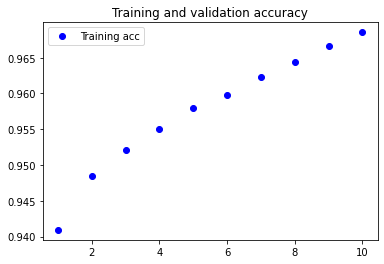

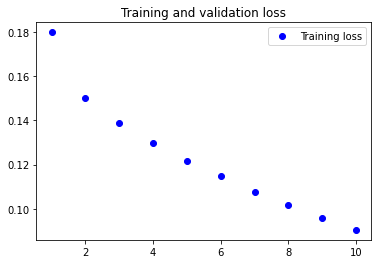

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 50, 300)           9000000   
_________________________________________________________________
masking_21 (Masking)         (None, 50, 300)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 65        
Total params: 9,097,665
Trainable params: 97,665
Non-trainable params: 9,000,000
______________________________________

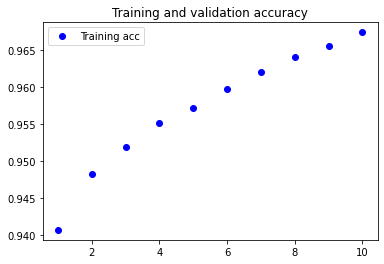

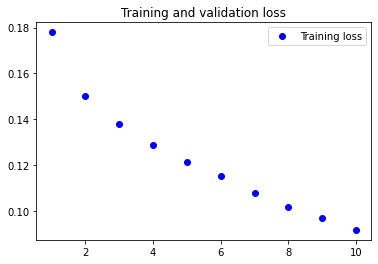

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 50, 300)           9000000   
_________________________________________________________________
masking_22 (Masking)         (None, 50, 300)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 65        
Total params: 9,097,665
Trainable params: 97,665
Non-trainable params: 9,000,000
______________________________________

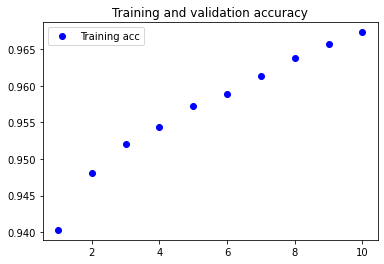

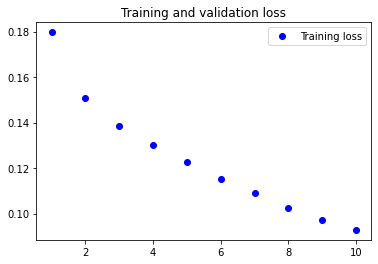

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 50, 300)           9000000   
_________________________________________________________________
masking_23 (Masking)         (None, 50, 300)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 9,097,665
Trainable params: 97,665
Non-trainable params: 9,000,000
______________________________________

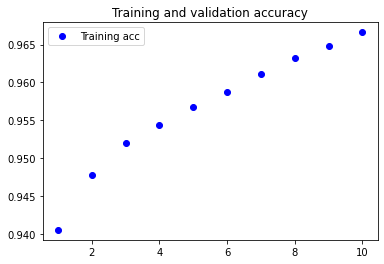

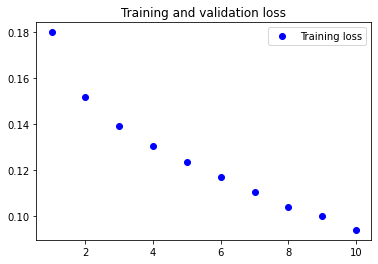

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 50, 300)           9000000   
_________________________________________________________________
masking_24 (Masking)         (None, 50, 300)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 65        
Total params: 9,097,665
Trainable params: 97,665
Non-trainable params: 9,000,000
______________________________________

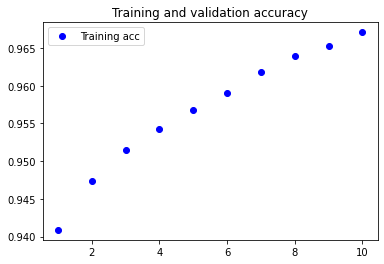

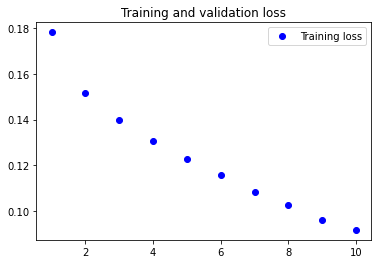

In [40]:
for i in range(5):
    x_train = a[0][i]
    x_test = a[1][i]
    y_train = a[2][i]
    y_test = a[3][i]
    with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
      makeNewModel(x_train, x_test, y_train, y_test,embeddingMatrix2, 300, 30000)

101601
Embeddings Matrix shape :  (101601, 400)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 400)           40640400  
_________________________________________________________________
masking_7 (Masking)          (None, 50, 400)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                119040    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 40,763,665
Trainable params: 123,265
Non-trainable params:

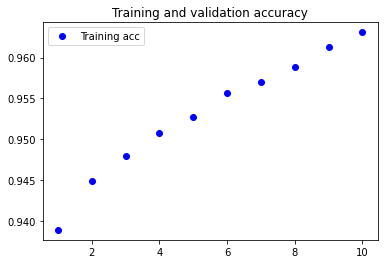

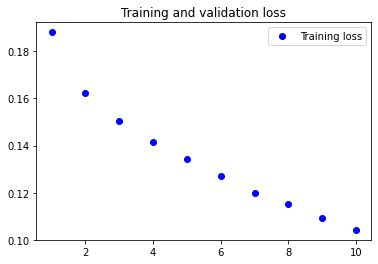

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 400)           40640400  
_________________________________________________________________
masking_8 (Masking)          (None, 50, 400)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                119040    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 40,763,665
Trainable params: 123,265
Non-trainable params: 40,640,400
____________________________________

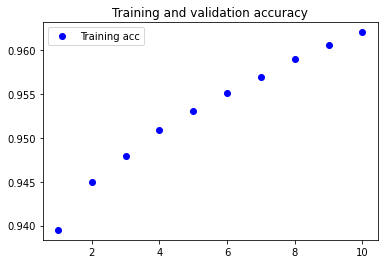

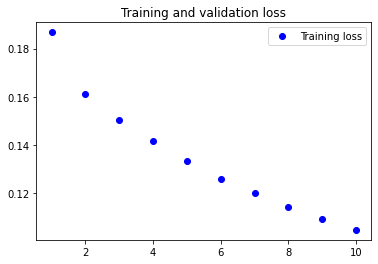

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 50, 400)           40640400  
_________________________________________________________________
masking_9 (Masking)          (None, 50, 400)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                119040    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 40,763,665
Trainable params: 123,265
Non-trainable params: 40,640,400
____________________________________

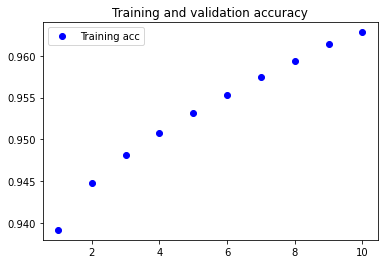

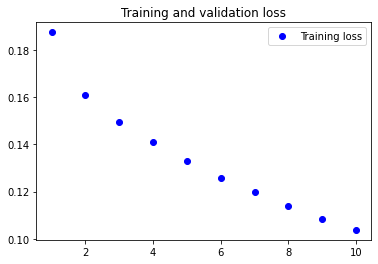

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 400)           40640400  
_________________________________________________________________
masking_10 (Masking)         (None, 50, 400)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                119040    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 40,763,665
Trainable params: 123,265
Non-trainable params: 40,640,400
___________________________________

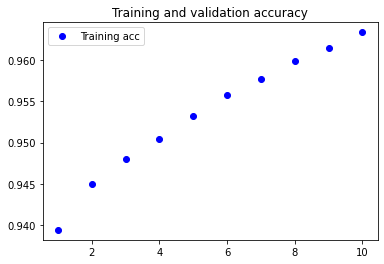

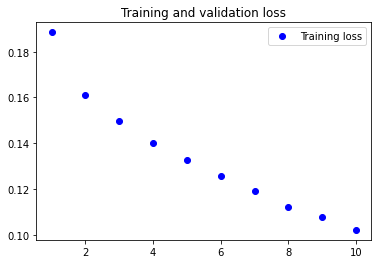

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 400)           40640400  
_________________________________________________________________
masking_11 (Masking)         (None, 50, 400)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                119040    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 40,763,665
Trainable params: 123,265
Non-trainable params: 40,640,400
___________________________________

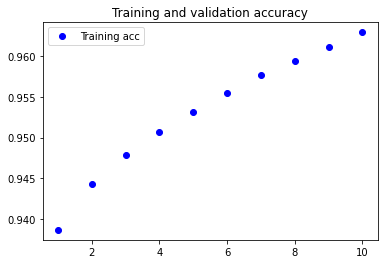

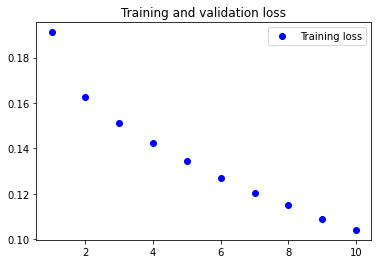

In [20]:
unique_words = len(word_index)
total_words = unique_words + 1


# for first embedding
for i in range(5):
    x_train = a[0][i]
    x_test = a[1][i]
    y_train = a[2][i]
    y_test = a[3][i]
    with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
      makeNewModel(x_train, x_test, y_train, y_test,embeddingMatrix1, 400,total_words)
    
# for second embedding


    

   

In [ ]:
print(len(a[0][4]))
print(len(a[1][4]))
print(len(a[2][4]))
print(len(a[3][4]))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim = max_words, input_length=maxlen, weights=[embedding_matrix],
                    output_dim=embedding_dim , trainable=False, mask_zero=True))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# LOADING THE G LO V E EMBEDDINGS IN THE MODEL

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [ ]:
x_train.shape

In [ ]:
# TRAINING AND EVALUATING THE MODEL

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

In [ ]:
# Now, plot the model’s performance over time
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

In [ ]:

import pandas as pd
import tensorflow as tf
import torch
import numpy as np
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from google.colab import drive

!pip3 install transformers
import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive 
a = drive.mount('/content/gdrive')

In [ ]:

import requests 
file_url = "http://vectors.nlpl.eu/repository/20/70.zip"
    
r = requests.get(file_url, stream = True) 
r
with open("/content/gdrive/My Drive/70.zip", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block) 

In [ ]:

# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/gdrive/My Drive/70.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

In [ ]:
!pip3 install TurkishStemmer